In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


Import the required library

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sc
%matplotlib inline

Loading of Data

In [3]:
data=pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv")

Inspecting first 5 rows

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Summary Statistics

In [5]:
data.shape

(10841, 13)

In [6]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Box plot and histogram plot of uncleaned data

<AxesSubplot:>

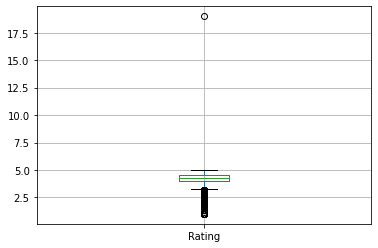

In [7]:
data.boxplot()

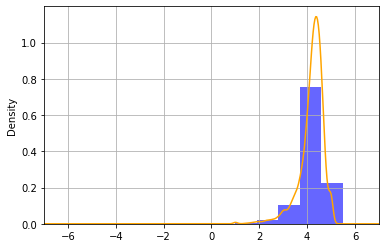

In [8]:
data['Rating'].hist(bins=20, density=True, stacked=True, color='blue', alpha=0.6)
data["Rating"].plot(kind='density', color='orange')

plt.grid()
plt.xlim(-7,7)
plt.show()

Data Cleaning

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
# Count the number of missing values in the dataframe
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
# As rating data have much nan value, so we need to replace the nan value in rating cloumns and drop nan value in other columns 
# As rating column contains right skewed data, so we replace the nan values with median and drop other nan values
# cleaning of rating data
rating_data=data[pd.notnull(data['Rating'])]

# mean,median,mode
mean=np.mean(rating_data['Rating'])
median=np.median(rating_data['Rating'])
mode=sc.mode(rating_data['Rating'])

print(mean,median,mode)

4.193338315362448 4.3 ModeResult(mode=array([4.4]), count=array([1109]))


In [12]:
data['Rating'].fillna(median,inplace=True)
data.dropna(inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [14]:
# Remove dublicate values

data.duplicated().value_counts()


False    10346
True       483
dtype: int64

In [15]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


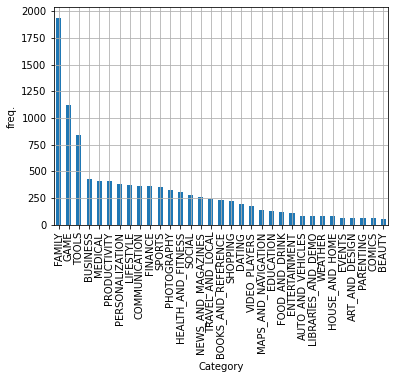

In [16]:
data['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('freq.')
plt.grid()
plt.show()

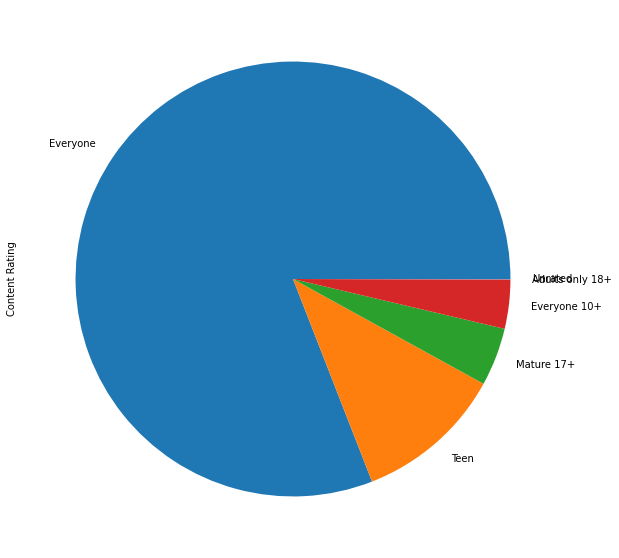

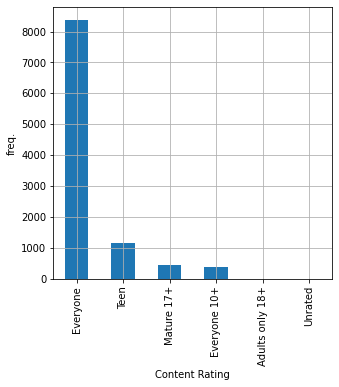

In [17]:
plt.figure(figsize=(20,10))
data['Content Rating'].value_counts().plot(kind='pie')
plt.show()

plt.figure(figsize=(5,5))
data['Content Rating'].value_counts().plot(kind='bar')
plt.xlabel('Content Rating')
plt.ylabel('freq.')

plt.grid()
plt.show()

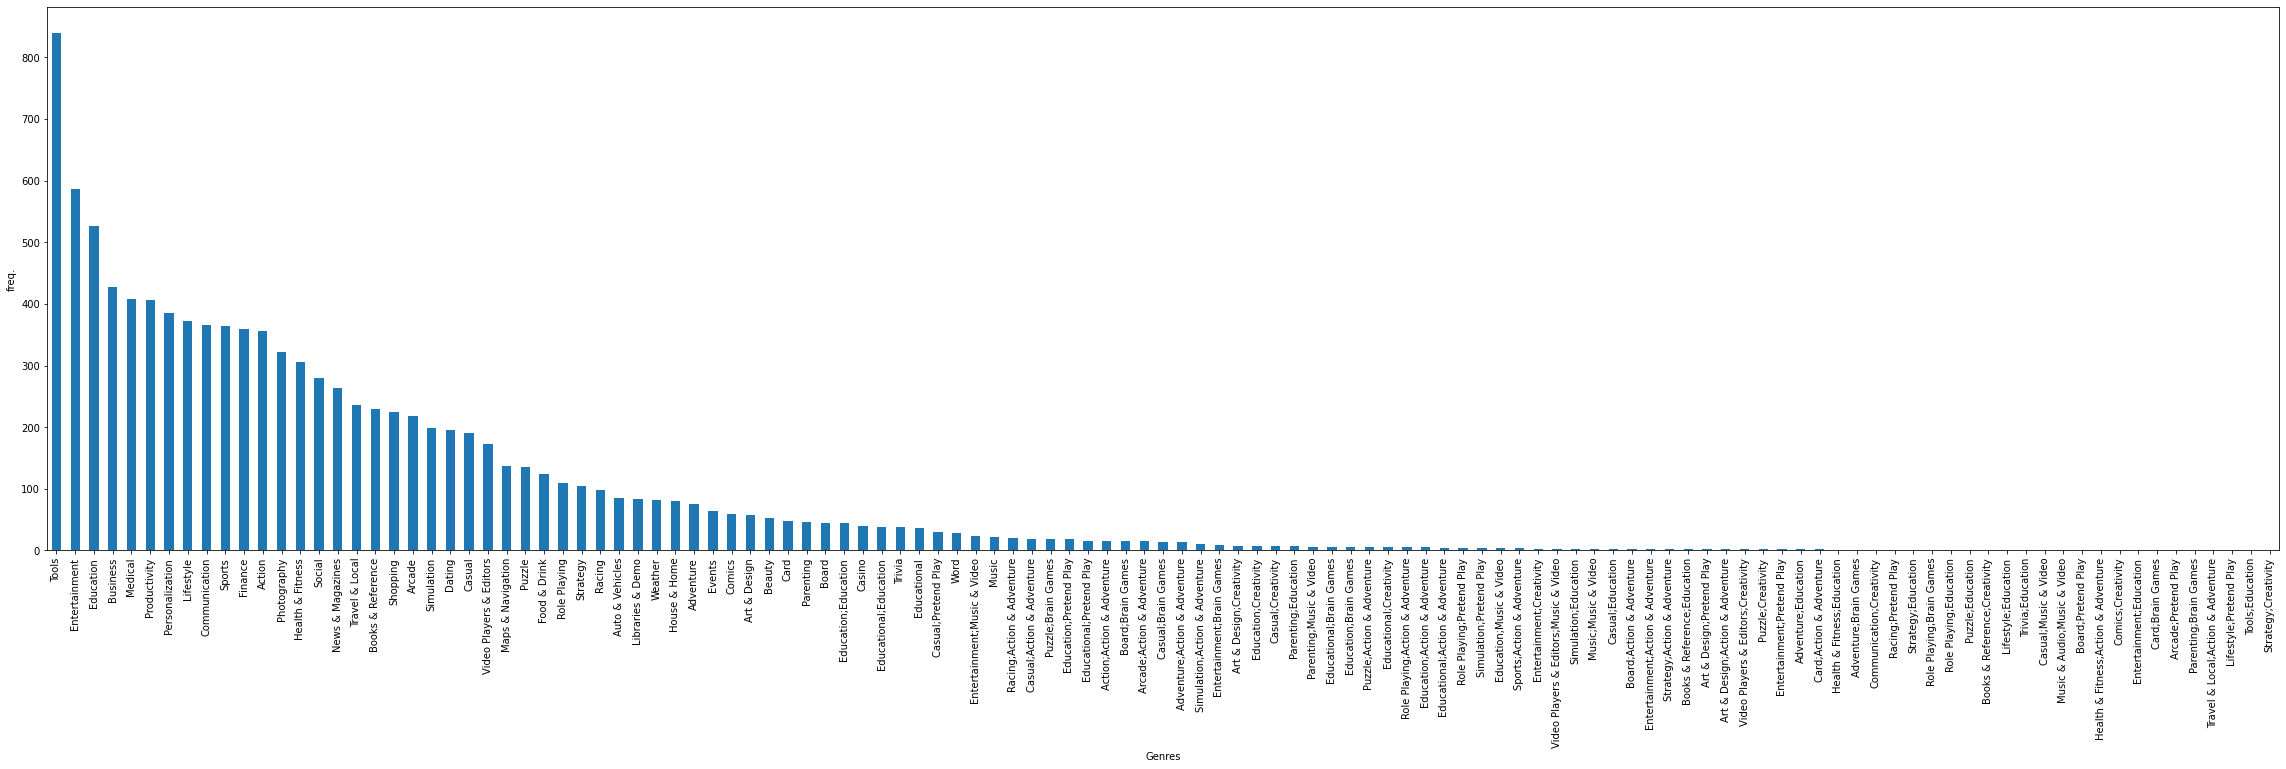

In [18]:
plt.figure(figsize=(40,10))
data['Genres'].value_counts().plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('freq.')
plt.show()

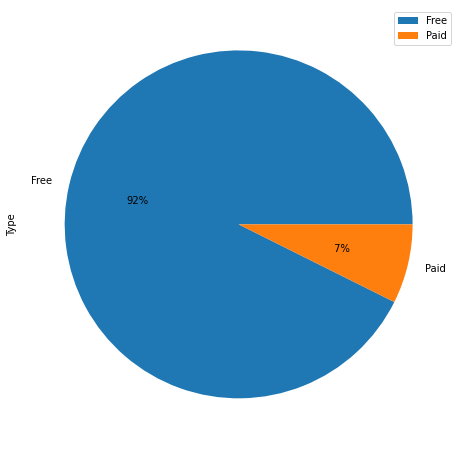

In [19]:
plt.figure(figsize=(10,8))
explode=[0.1,0]
data['Type'].value_counts().plot(kind='pie',autopct="%2i%%")
plt.legend()
plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [21]:
# converting last date
data['Last Updated']=pd.to_datetime(data['Last Updated'])
data['before update']=data['Last Updated'].max()-data['Last Updated']

data['Installs']=data['Installs'].str.replace(',','').str.replace('+','').astype('int')

# converting review to int
data['Reviews']=data['Reviews'].astype('int')

# converting size
data['Size']=data['Size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')

data['Price']=data['Price'].str.replace('$','').astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   App             10346 non-null  object         
 1   Category        10346 non-null  object         
 2   Rating          10346 non-null  float64        
 3   Reviews         10346 non-null  int64          
 4   Size            10346 non-null  float64        
 5   Installs        10346 non-null  int64          
 6   Type            10346 non-null  object         
 7   Price           10346 non-null  float64        
 8   Content Rating  10346 non-null  object         
 9   Genres          10346 non-null  object         
 10  Last Updated    10346 non-null  datetime64[ns] 
 11  Current Ver     10346 non-null  object         
 12  Android Ver     10346 non-null  object         
 13  before update   10346 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(3), int6

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  del sys.path[0]


In [22]:
# max size app
# data[data['Size']==data['Size'].max()]

In [23]:
# max size install app
# data[data['Installs']==data['Installs'].max()]

In [24]:
# App with largest number of reviews
#data[data['Reviews']==data['Reviews'].max()]

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

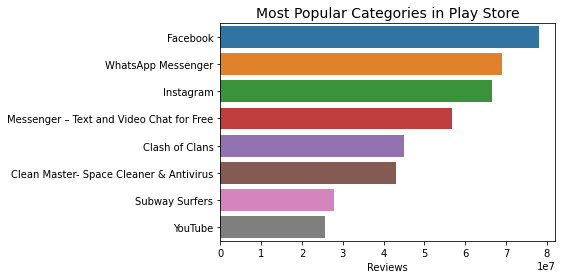

In [25]:
# most reviewed apps
review_sorted = data.sort_values(['Reviews'],ascending = False )[:20]
ax = sns.barplot(x = 'Reviews' , y = 'App' , data = review_sorted )
ax.set_xlabel('Reviews')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 14)

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

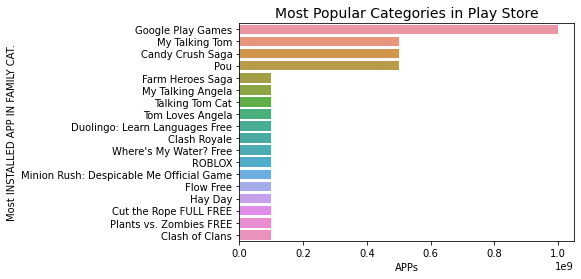

In [26]:
# most populer catogry by Family
data_cat=data[data['Category']=='FAMILY'].sort_values(['Installs'],ascending=0)[:20]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN FAMILY CAT.')
ax.set_title("Most Popular Categories in Play Store", size = 14)

Text(0.5, 1.0, 'Most Popular Game Categories in Play Store')

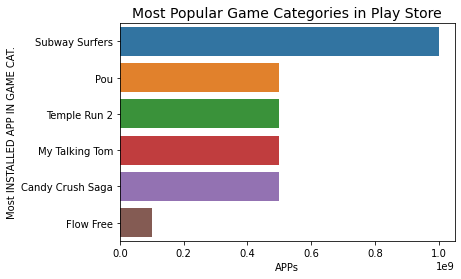

In [27]:
data_cat=data[data['Category']=='GAME'].sort_values(['Installs'],ascending=0)[:20]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN GAME CAT.')
ax.set_title("Most Popular Game Categories in Play Store", size = 14)

Text(0.5, 1.0, 'Most Popular Tools Categories in Play Store')

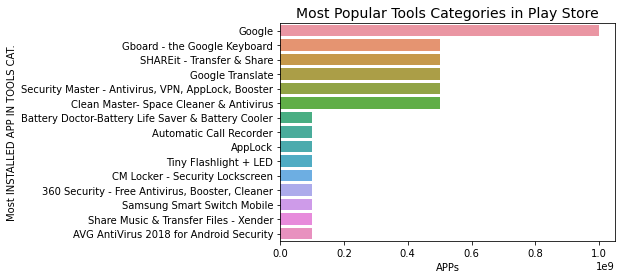

In [28]:
data_cat=data[data['Category']=='TOOLS'].sort_values(['Installs'],ascending=0)[:20]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN TOOLS CAT.')
ax.set_title("Most Popular Tools Categories in Play Store", size = 14)

Text(0.5, 1.0, 'Most Popular Business Categories in Play Store')

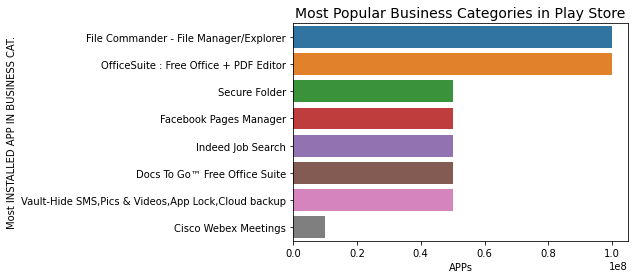

In [29]:
data_cat=data[data['Category']=='BUSINESS'].sort_values(['Installs'],ascending=0)[:10]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN BUSINESS CAT.')
ax.set_title("Most Popular Business Categories in Play Store", size = 14)

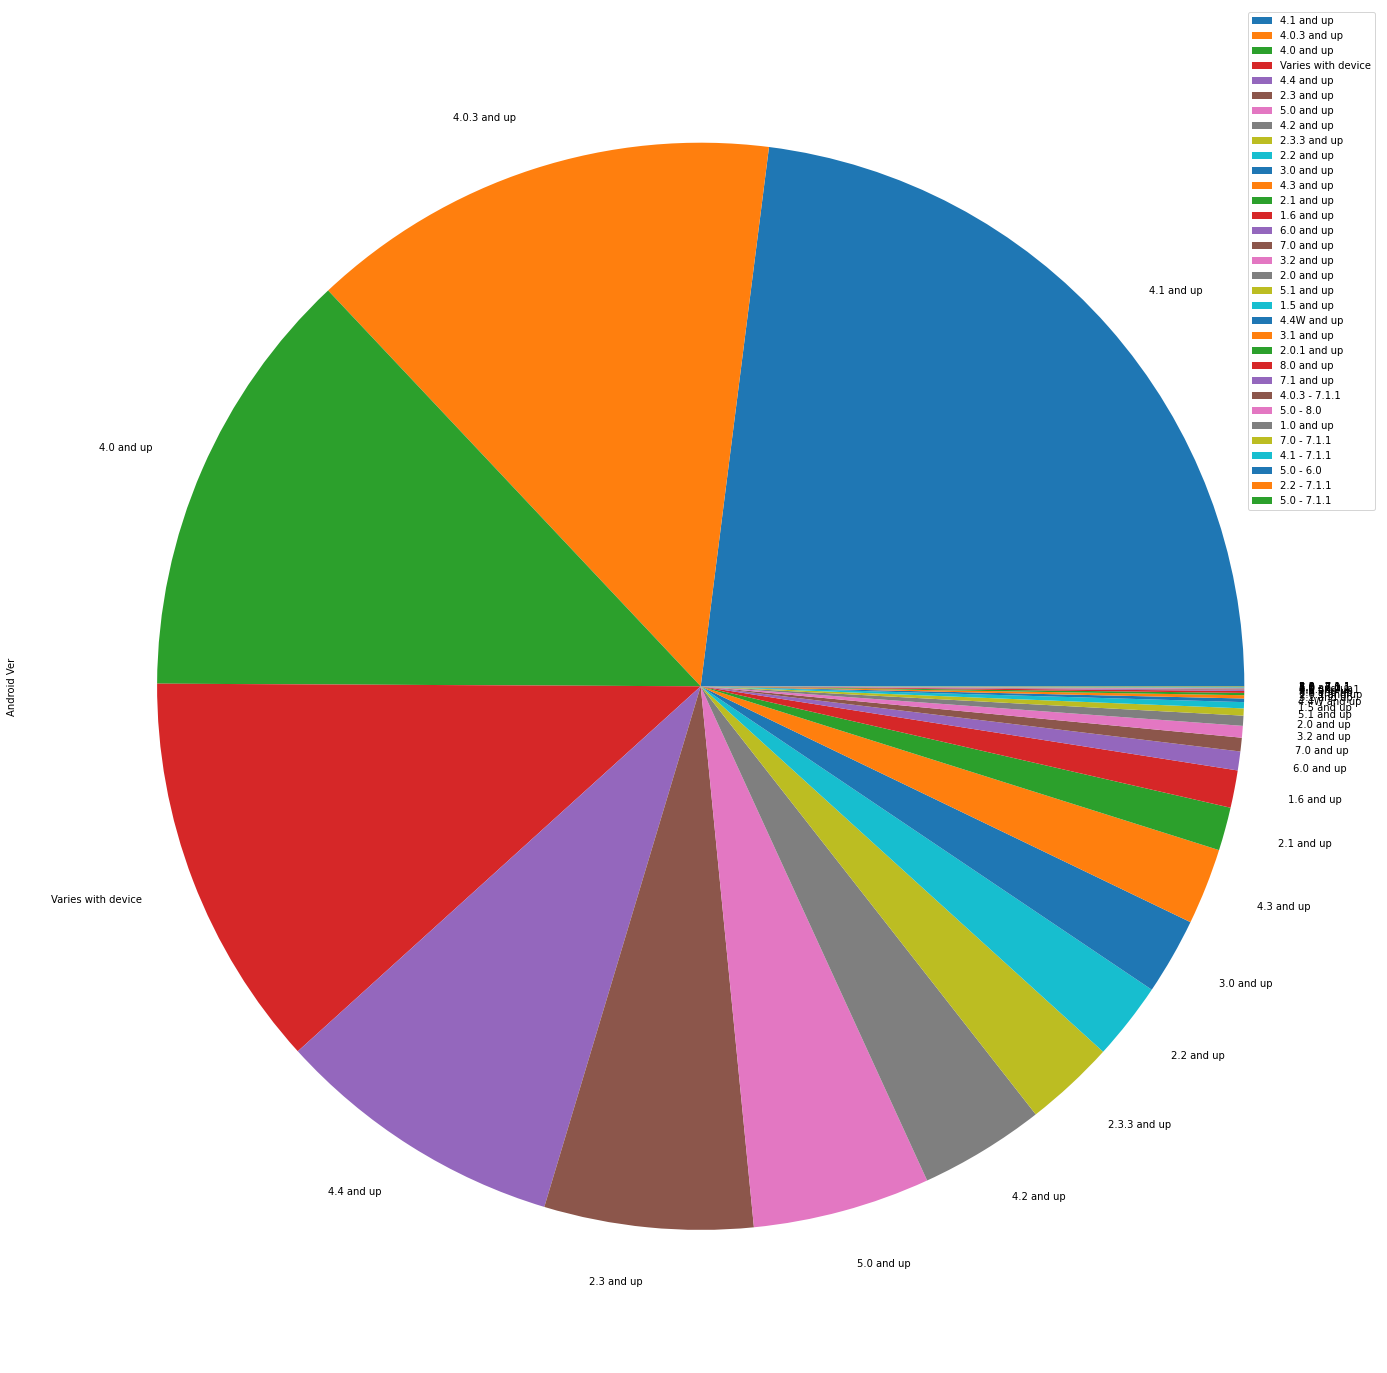

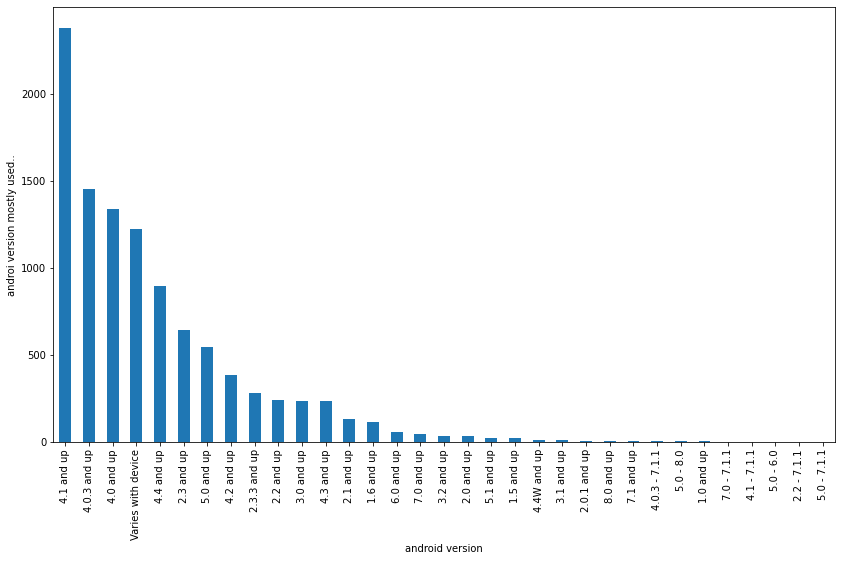

In [30]:
# most use version of android in android phones
plt.figure(figsize=(25,25))
data['Android Ver'].value_counts().plot(kind='pie')
plt.legend()
plt.show()
plt.figure(figsize=(14,8))
data['Android Ver'].value_counts().plot(kind='bar')
plt.xlabel('android version')
plt.ylabel('androi version mostly used..')

plt.show()